# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df1=pd.read_csv('twitter_archive_enhanced.csv')
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df2=pd.read_csv('image_prediction.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)
'''
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet-json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

In [7]:
data = []
with open('tweet_json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))
df3 = pd.DataFrame(data)
df3.to_csv(r'tweets_json.csv',index=False,header=True)

In [8]:
df3 = pd.read_csv('tweets_json.csv')


In [9]:
# Creating a dataframe from the previous List that contains the id, retweet count, and favorite count
tweet_api=pd.DataFrame(data, columns=['id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
# Changing the name of the id column to tweet_id
tweet_api = tweet_api.rename (columns = {'id' : 'tweet_id' })
tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
# Saving the dataframe to a csv file for future use (without the index column so it will not appear as unnamed column in the file)
tweet_api.to_csv('tweet_api.csv',index=False)

In [13]:
#Checking the file was saved correctly
x = pd.read_csv('tweet_api.csv')
x.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

In [14]:
# Assessing twitter dataset visually.
# Displayinh first five rows.
df1.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [16]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
# Asscessing twitter dataset visually.
# Displaying last five rows.
df1.tail()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
# Asscessing twitter dataset visually.
# Displaying random 20 rows.
df1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None
2233,668204964695683073,NaN,NaN,2015-11-21 23:10:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ron. Ron's currently experiencing a br...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,None,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
225,849051919805034497,NaN,NaN,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None


In [19]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
# Asscessing predictions dataset visually.
# Displaying first fifty rows
df2.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
# Asscessing predictions dataset visually.
# Displaying last five rows.
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
# Asscessing predictions dataset visually.
# Displaying 10 random rows.
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_shepherd,0.001746,True
1085,718613305783398402,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True


In [26]:
# Just curious how this photo was identified as a bathtub
df2.loc[1312, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [27]:
from IPython.display import Image
Image(url= 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')
# Now I understand :)

In [28]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
# Asscessing tweet_api dataset visually.
# Displaying first five rows
tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [30]:
# Asscessing tweet_api dataset visually.
# Displaying last five rows.
df3.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,False,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,NaN,NaN,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,False,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,NaN,NaN,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,NaN,...,False,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,NaN,NaN,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,False,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,False,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [31]:
# Asscessing tweet_api dataset visually.
# displaying 10 random rows.
tweet_api.sample(10)

,tweet_id,retweet_count,favorite_count
711,784431430411685888,1491,6329
1699,680940246314430465,1225,3544
887,759793422261743616,2173,6620
1887,674774481756377088,532,1213
2271,667470559035432960,102,273
1599,686003207160610816,735,2009
732,781308096455073793,2961,7973
2041,671536543010570240,441,1253
466,817120970343411712,3011,13367
1061,741067306818797568,3520,10342


In [32]:
tweet_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Quality issues



#### A) Enhanced Twitter Archive
* Q1. There are 181 retweetes as indicated by retweeted _status_id.
* Q2. Some dog names are invalid (None, a, an, & the instead of name).
* Q3. Invalid tweet_id data type (integer instead of string).
* Q4. Invalid timestamp data type (string not datetime).
* Q5. 440 rating numerators less than 10 (ex: 1998).
* Q6. Row 313 has 0 denominator.
* Q7. 23 rating denominators not equal 10.

#### B) Tweet Image Predictions
* Q1. Missing photos for some IDs (2075 rows instead of 2356).
* Q2. Underscores are used in multi-word names in columns p1, p2, & p3 instead of spaces.
* Q3. Some P names start with an uppercase letter while others start with lowercase.

#### C) Tweet Data From Twitter API
* Q1. Missing entries (Only 2354 entries instead of 2356).

### Tidiness issues
* T1. Dog stage data is separated into 4 columns.

* T2. All data is related but divided into 3 separate dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data

df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=tweet_api.copy()

In [34]:
df1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [35]:
df2_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [36]:
df3_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Cleaning Tidiness Issues 

#### T1. Dog stage data is separated into 4 columns.


#### Define: 

Merge the 4 columnc into 1, called dog_stage

#### Code

In [37]:
# Extract dog stage from text column into the new dog_stage column
df1_clean['dog_stage'] = df1_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [38]:
# Drop unrequired columns
df1_clean= df1_clean.drop(columns=['doggo','floofer','pupper', 'puppo'])

In [39]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


df1['pattern'] = df1['text'].apply(get_pattern)
df1['fraction'] = df1['rating_numerator'].astype(str) + '/' + df1['rating_denominator'].astype(str)
df1[df1['pattern'] != df1['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


#### Test

In [40]:
df1_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### T2. All data is related but divided into 3 separate dataframes.

#### Define:

Merge all dataframes into 1 based on tweet_id


#### Code

In [41]:
# converting tweet_id datatype to int in order to merge

df1_clean['tweet_id'] = df1_clean['tweet_id'].fillna(0)

df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(int)


In [42]:

# Merging the cleaned Enhanced Twitter Archive data with the data from Twitter API
df1_clean= pd.merge(df1_clean, df3_clean, on='tweet_id', how= 'left')

# Merging the resulting merged archive with the Tweet Image Predictions
df1_clean = pd.merge(df1_clean, df2_clean , on='tweet_id', how='left')

#### Test

In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2138 non-null float64
favorite_count                2138 non-null float64
jpg_url                       2138 non-null object
img_num                       2

### Cleaning Quality Issues

Not all quality issues will be cleaned since such data will not be used for analysis

### AQ1. There are 181 retweetes as indicated by retweeted_status_id

#### Define: 

Delete rows that represent retweets and all related columns


#### Code

In [44]:
#Keep only original tweets that have no retweet statud id
df1_clean=df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
retweet_count                 1994 non-null float64
favorite_count                1994 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 no

In [45]:
# Delete related colums
df1_clean= df1_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test


In [46]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf              

### AQ2. Some dog names are invalid (None, a, an, & the instead of name)

#### Define: 

Convert invalid names (None or starting with lower case letters) to NaN and extract the correct names from the text column (after the word "named")



#### Code

In [47]:
df1_clean.name = df1_clean.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

# Checking number of null values in name column after conversion
sum(df1_clean.name.isnull())

784

In [48]:
# Declare a function to extract names from text column, and return NaN if there is no "named" word

def function(text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) + 1 # word after "named" 
            return txt_list[name_index]
        else:
            pass
    return np.nan

In [49]:
#np.where(condition, what to do if condition is true, what to do if condition is false)
df1_clean.name = np.where(df1_clean.name.isnull(), df1_clean.text.apply(function), df1_clean.name)

#### Test


In [50]:
sum(df1_clean.name.isnull())
# Names were added in place of some null values.

761

### AQ3. Invalid tweet_id data type (integer instead of string)

#### Define: 

Correct invalid data type by converting tweet_id to string


#### Code

In [51]:
# Convert tweet_id to string since no operation will be perforned on its values
df1_clean.tweet_id= df1_clean.tweet_id.astype(str)

#### Test


In [52]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

### AQ4. Invalid timestamp data type (string not datetime)

#### Define: 

Correct invalid data type by converting timestamp to datetime


#### Code

In [53]:
# Convert timestampm to datetime
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

#### Test


In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

### BQ1. Missing photos for some IDs (2075 rows instead of 2356).

#### Define: 

Delete rows with missing photos


#### Code

In [55]:
df2_clean = df2_clean[df2_clean.jpg_url.notnull()]

#### Test


In [56]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


### BQ2. Underscores are used in multi-word names in columns p1, p2, & p3 instead of spaces.

#### Define: 

Replace underscores in multi-word names in columns p1, p2, & p3 with spaces.

#### Code

In [57]:
df2_clean.p1 = df2_clean.p1.str.replace('_',' ')
df2_clean.p2 = df2_clean.p2.str.replace('_',' ')
df2_clean.p3 = df2_clean.p3.str.replace('_',' ')

#### Test


In [58]:
df2_clean.p1.head(10)

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
5      Bernese mountain dog
6                box turtle
7                      chow
8             shopping cart
9          miniature poodle
Name: p1, dtype: object

In [59]:
df2_clean.p2.head(10)

0                collie
1    miniature pinscher
2              malinois
3               redbone
4            Rottweiler
5      English springer
6            mud turtle
7       Tibetan mastiff
8       shopping basket
9              komondor
Name: p2, dtype: object

In [60]:
df2_clean.p3.head(10)

0              Shetland sheepdog
1            Rhodesian ridgeback
2                     bloodhound
3             miniature pinscher
4                       Doberman
5     Greater Swiss Mountain dog
6                       terrapin
7                       fur coat
8               golden retriever
9    soft-coated wheaten terrier
Name: p3, dtype: object

### BQ3. Some P names start with an uppercase letter while others start with lowercase.

#### Define: 

Convert lowercase letters to uppercase

#### Code

In [61]:
df2_clean.p1 = df2_clean.p1.str.title()
df2_clean.p2 = df2_clean.p2.str.title()
df2_clean.p3 = df2_clean.p3.str.title()

#### Test


In [62]:
df2_clean.p1.head(10)

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
5      Bernese Mountain Dog
6                Box Turtle
7                      Chow
8             Shopping Cart
9          Miniature Poodle
Name: p1, dtype: object

In [63]:
df2_clean.p2.head(10)

0                Collie
1    Miniature Pinscher
2              Malinois
3               Redbone
4            Rottweiler
5      English Springer
6            Mud Turtle
7       Tibetan Mastiff
8       Shopping Basket
9              Komondor
Name: p2, dtype: object

In [64]:
df2_clean.p3.head(10)

0              Shetland Sheepdog
1            Rhodesian Ridgeback
2                     Bloodhound
3             Miniature Pinscher
4                       Doberman
5     Greater Swiss Mountain Dog
6                       Terrapin
7                       Fur Coat
8               Golden Retriever
9    Soft-Coated Wheaten Terrier
Name: p3, dtype: object

### CQ1. Missing entries (Only 2354 entries instead of 2356).

#### Define: 

Delete rows without retweet count entries

#### Code

Deleted in previus steps while cleaning other issues

#### Test


In [65]:
sum(df3_clean.retweet_count.isnull())

0

### Final Test

In [66]:
df1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
dog_stage                364 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

In [67]:
df2_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


In [68]:
df3_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [69]:
df1_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### A. The percentage of different dog stages

In [70]:
stage_df = df1_clean.dog_stage.value_counts()
stage_df

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

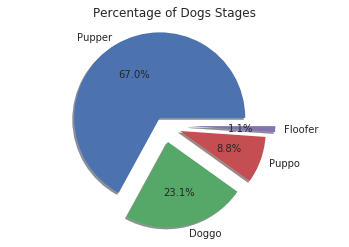

In [71]:
# Creating a pie chert

plt.pie(stage_df,
      labels= ['Pupper','Doggo', 'Puppo', 'Floofer'], 
      autopct= '%1.1f%%', # To show percent on plot. 1.1 formats the percentage to the tenth place.
      shadow=True,
      explode=(0.1, 0.2, 0.2, 0.3))
plt.title('Percentage of Dogs Stages')
plt.axis('equal'); # By default, matplotlib creates pie charts with a tilt. This Line remove this tilt

### Insights:
1. Pupper has the highest percentage.

2. Floofer has the lowest percentage.


### B. Relationship between retweet count and favorite count

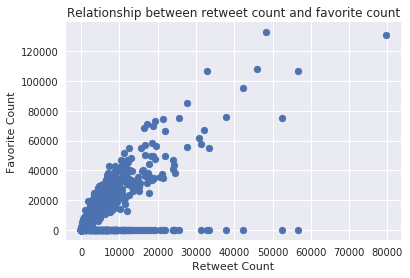

In [84]:
plt.scatter(df3_clean.retweet_count, df3_clean.favorite_count)
plt.title('Relationship between retweet count and favorite count') 
plt.xlabel ('Retweet Count')
plt.ylabel('Favorite Count');

### Insights:

As shown in the graph, there is a positive correlation relationship in such as Retweet Count increases, Favorite Count increases as well.